### Question 1

In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [268]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\Glass Identification.csv")
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [270]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [272]:
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [274]:
 df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [276]:
df["Type of glass"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

<Figure size 1200x600 with 0 Axes>

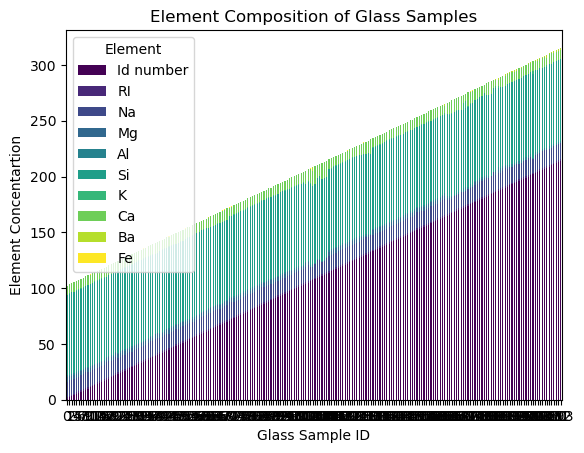

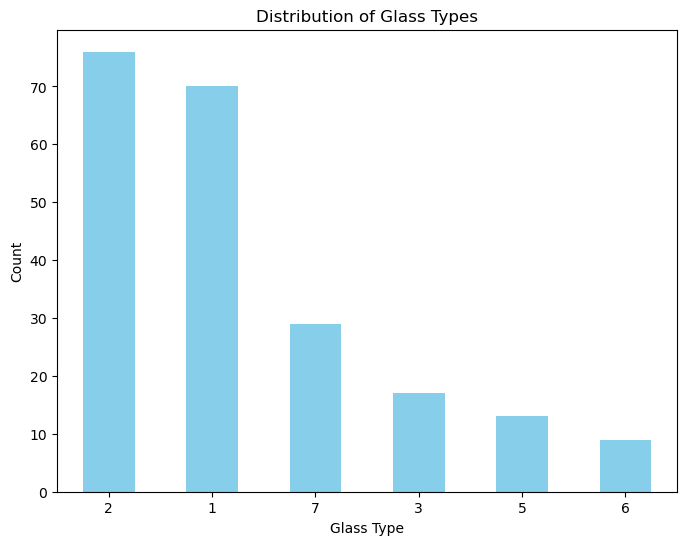

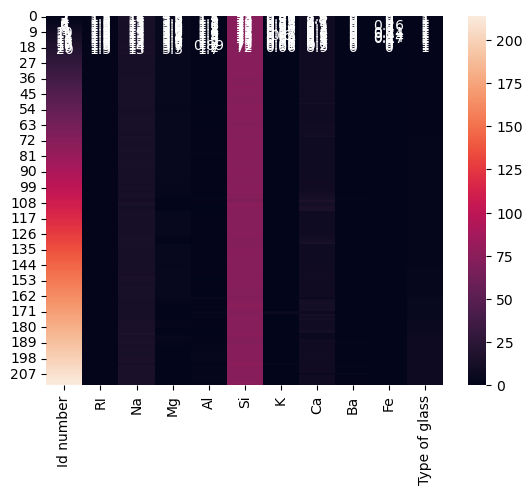

In [278]:
plt.figure(figsize=(12, 6))
df.drop('Type of glass', axis=1).plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Element Composition of Glass Samples')
plt.xlabel('Glass Sample ID')
plt.ylabel('Element Concentartion')
plt.xticks(rotation=0)
plt.legend(title='Element')
plt.show()

glass_type_counts = df['Type of glass'].value_counts()
plt.figure(figsize=(8, 6))
glass_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

sns.heatmap(df,annot=True)
plt.show()

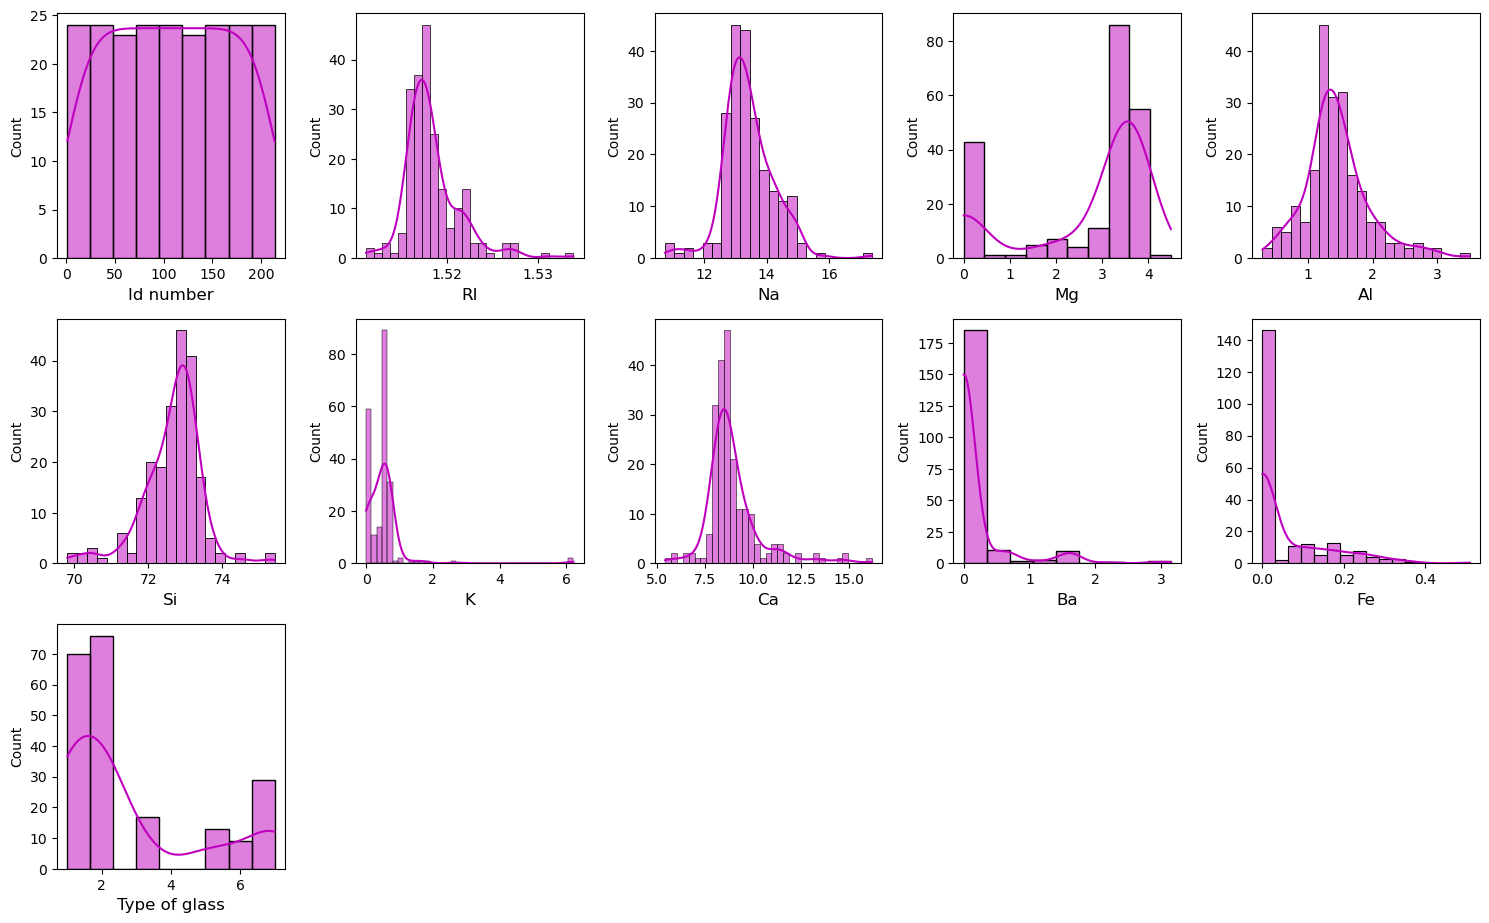

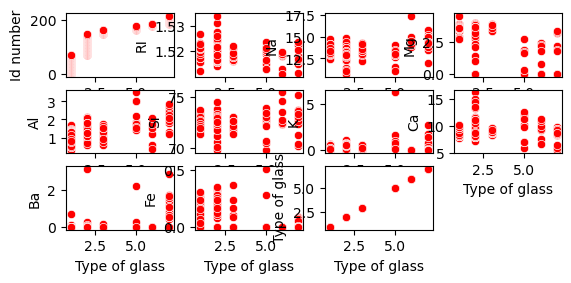

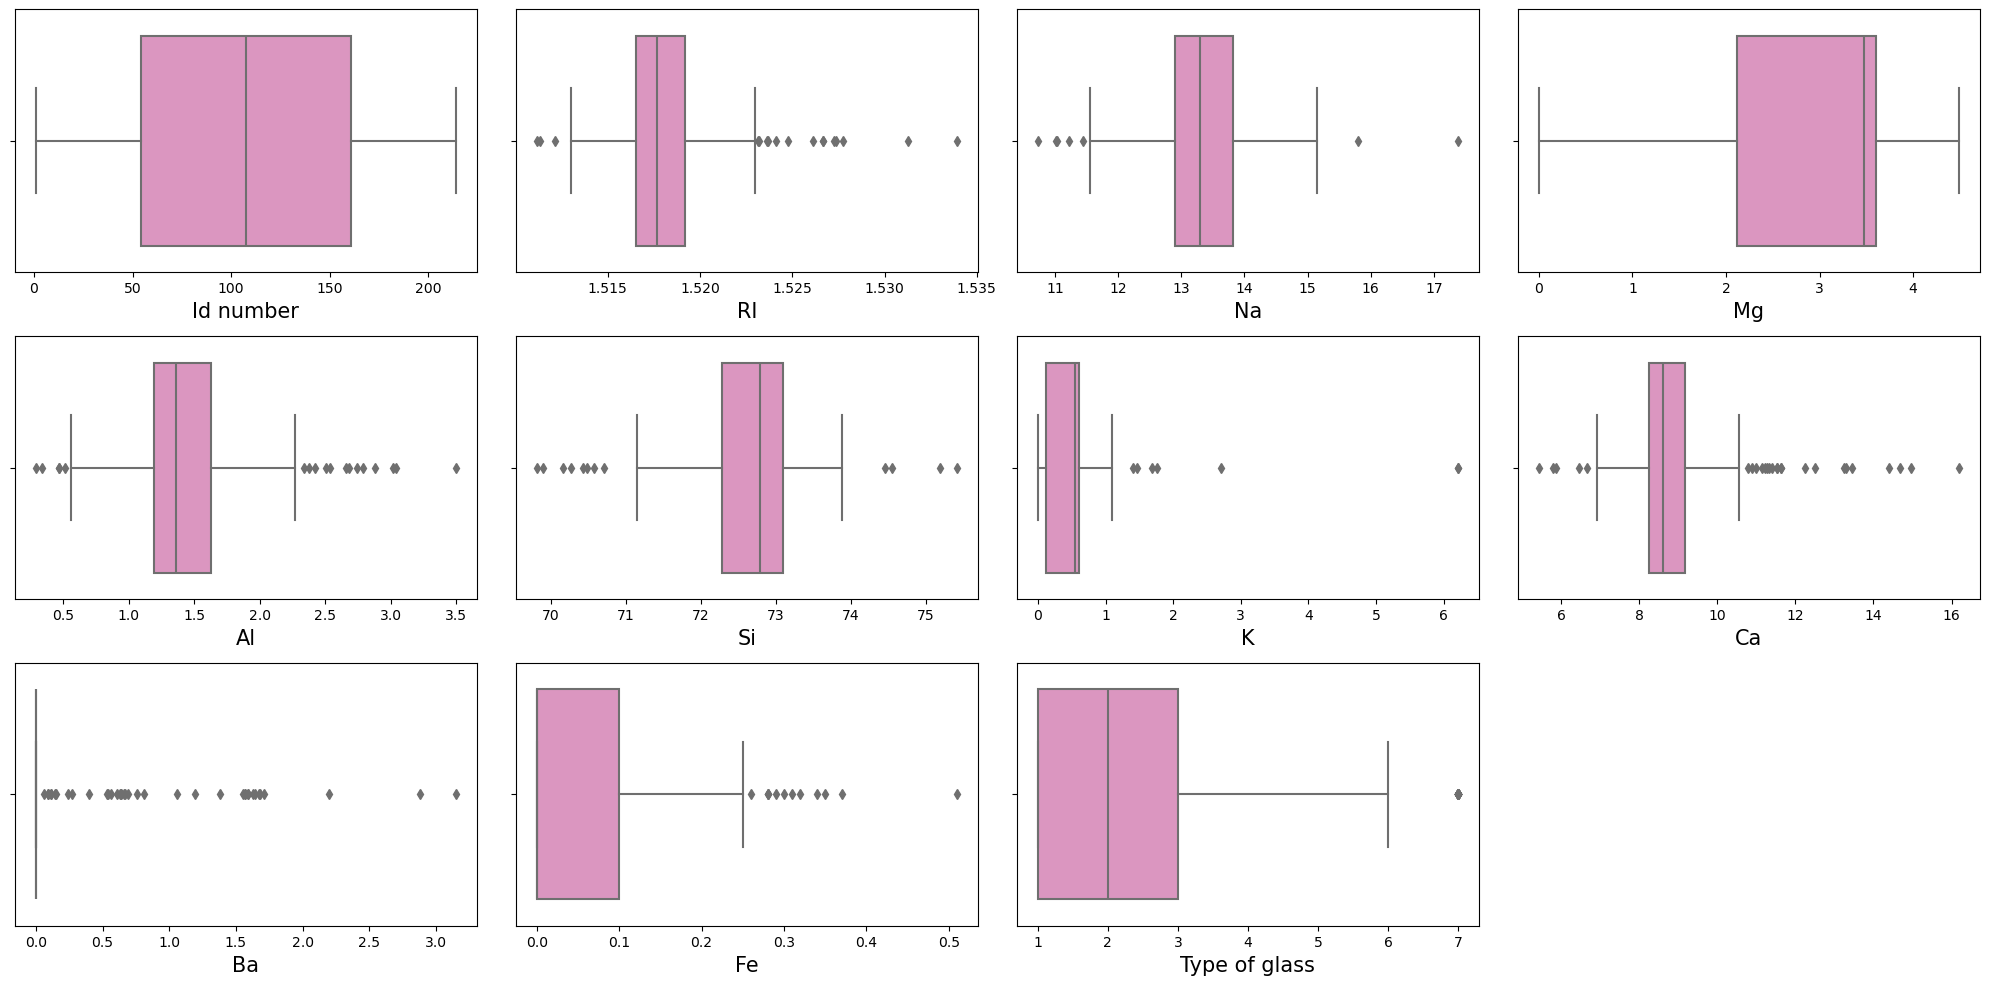

In [279]:
numerical_col = df.select_dtypes(include=[np.number]).columns.tolist()
plotnumber = 1
plt.figure(figsize=(15, 15))
for col in numerical_col:
    if plotnumber <= 25:
        plt.subplot(5, 5, plotnumber)
        sns.histplot(df[col], kde=True, color="m")
        plt.xlabel(col, fontsize=12)
        plotnumber += 1

    else:
        break

plt.tight_layout()
plt.show()

plt.figure(figure = (20, 25))
p = 1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x="Type of glass",y=i , data = df, color='r')
        plt.xlabel("Type of glass")
        plt.ylabel(i)
    p+=1
plt.show()
num_numerical_cols = len(numerical_col)
num_rows = 5
num_cols = 4
total_subplots = num_rows * num_cols
plt.figure(figsize=(20, 16), facecolor="white")
plotnumber = 1
for col in numerical_col:
    if plotnumber <=total_subplots:
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        plotnumber += 1
plt.tight_layout()
plt.show()

In [280]:
columns_of_interest= ['RI','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = df[((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]
df1 = df[~((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]
print("Dataframe after removing outliers:")
print(df1)
print("Outliers removed:")
print(outliers)

Dataframe after removing outliers:
     Id number       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  \
0            1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   
1            2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   
2            3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   
3            4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   
4            5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   
..         ...      ...    ...   ...   ...    ...   ...   ...  ...  ...   
176        177  1.51905  14.00  2.39  1.56  72.37  0.00  9.57  0.0  0.0   
177        178  1.51937  13.79  2.41  1.19  72.76  0.00  9.77  0.0  0.0   
178        179  1.51829  14.46  2.24  1.62  72.38  0.00  9.26  0.0  0.0   
179        180  1.51852  14.09  2.19  1.66  72.67  0.00  9.32  0.0  0.0   
181        182  1.51888  14.99  0.78  1.74  72.50  0.00  9.95  0.0  0.0   

     Type of glass  
0                1  
1                1  
2

In [281]:
df1.skew()

Id number        0.142191
RI               1.052990
Na               0.843116
Mg              -3.404660
Al              -0.100644
Si              -0.476993
K               -1.022915
Ca               0.808200
Ba               0.000000
Fe               1.395243
Type of glass    2.122805
dtype: float64

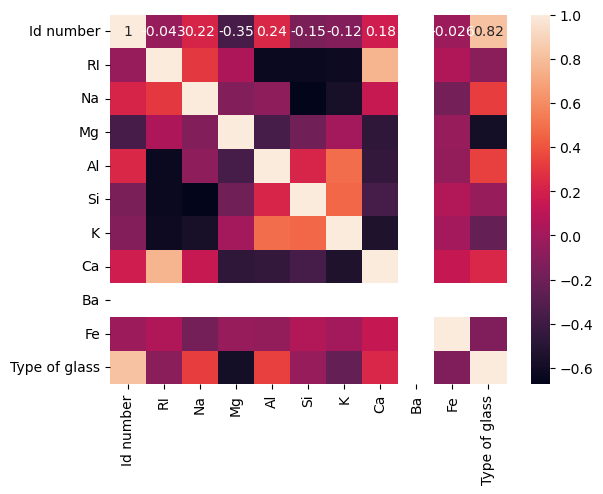

In [282]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [283]:
df1.drop(["Id number"], axis=1, inplace=True)

In [284]:
x = df1.drop(['Type of glass'], axis=1)
y = df1["Type of glass"].apply(lambda y_value: 1 if y_value>= 5 else 0)
print(y)
print("Feature Dimensions = ",x.shape)
print("Label Dimensions",y.shape)

y.value_counts()

0      0
1      0
2      0
3      0
4      0
      ..
176    1
177    1
178    1
179    1
181    1
Name: Type of glass, Length: 136, dtype: int64
Feature Dimensions =  (136, 9)
Label Dimensions (136,)


Type of glass
0    129
1      7
Name: count, dtype: int64

In [285]:
sm = SMOTE(k_neighbors=1)
x1, y1 = sm.fit_resample(x, y)
y1.value_counts()

Type of glass
0    129
1    129
Name: count, dtype: int64

In [286]:
x1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.521010,13.640000,4.490000,1.100000,71.780000,0.060000,8.750000,0.0,0.0
1,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.0,0.0
2,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.0,0.0
3,1.517660,13.210000,3.690000,1.290000,72.610000,0.570000,8.220000,0.0,0.0
4,1.517420,13.270000,3.620000,1.240000,73.080000,0.550000,8.070000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
253,1.519165,13.924817,2.397160,1.427535,72.509625,0.000000,9.641603,0.0,0.0
254,1.518349,14.513220,2.093395,1.632050,72.392050,0.000000,9.329286,0.0,0.0
255,1.518375,14.322520,2.221422,1.634863,72.487754,0.000000,9.282294,0.0,0.0
256,1.518677,14.063357,2.249207,1.630396,72.581189,0.000000,9.394009,0.0,0.0


In [287]:
y1

0      0
1      0
2      0
3      0
4      0
      ..
253    1
254    1
255    1
256    1
257    1
Name: Type of glass, Length: 258, dtype: int64

In [288]:
maxAccu = 0
maxRS = 0
for i in range(1, 50):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    ETR = ExtraTreesClassifier()
    ETR.fit(x_train,y_train)
    pred = ETR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        macRS = i
print("Accuracy", maxAccu, "at random state", maxRS)

Accuracy 1.0 at random state 0


In [289]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [290]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
accuracy = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix:")
print(conf_matrix)
report = classification_report(y_test, pred_rf)
print("Classification Report:")
print(report)
      

Accuracy: 1.0
Confusion Matrix:
[[28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [306]:
parameters = {'criterion':['gini','entropy'],
              'random_state':[10,50,1000],
              'max_depth':[0,10,20],
              'n_jobs':[-2,-1,1],
              'n_estimators':[50,100,200,300]}
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv = 5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 50}

In [310]:
Model = RandomForestClassifier(criterion = "gini", max_depth = 10, n_jobs = -2, random_state = 50, n_estimators = 50)
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

100.0


In [322]:
df1


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6
177,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.0,0.0,6
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6


### Question 2

In [26]:
import optuna
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [30]:

def preprocess_data(data):
    data.drop('Seat No.', axis=1, inplace=True)
    
    X = data.drop('CGPA', axis=1)
    y = data['CGPA']
    
    label_encoders = {}
    for column in X.columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le
    
    return X, y, label_encoders

data = pd.read_csv(r"C:\Users\ADMIN\Downloads\Grades.csv")

X, y, label_encoders = preprocess_data(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 14)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 14)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params



[I 2024-06-14 23:16:00,988] A new study created in memory with name: no-name-f952eca3-cb1b-49eb-8c79-f335ba118b5e
[I 2024-06-14 23:16:01,175] Trial 0 finished with value: 0.18565572868373992 and parameters: {'n_estimators': 112, 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.18565572868373992.
[I 2024-06-14 23:16:01,422] Trial 1 finished with value: 0.1557431986249521 and parameters: {'n_estimators': 127, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.1557431986249521.
[I 2024-06-14 23:16:01,634] Trial 2 finished with value: 0.1453138031025298 and parameters: {'n_estimators': 111, 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.1453138031025298.
[I 2024-06-14 23:16:01,858] Trial 3 finished with value: 0.15351436152311448 and parameters: {'n_estimators': 123, 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 12}. Best is trial 2 with v

In [32]:
best_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mse_best ** 0.5

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear ** 0.5

svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5

print(f'Random Forest RMSE: {rmse_best:.2f}')
print(f'Linear Regression RMSE: {rmse_linear:.2f}')
print(f'SVR RMSE: {rmse_svr:.2f}')



Random Forest RMSE: 0.11
Linear Regression RMSE: 0.12
SVR RMSE: 0.09
